# Geospatial Data & Mapping In Python

In [ ]:
# Install geopandas and descartes libraries
!conda install --yes geopandas descartes

In [2]:
import pandas as pd
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt

## Pandas - A quick overview

If you are not familiar with it, [Pandas](https://pandas.pydata.org/) is a widely used python library (along with its counterparts Matplotlib, NumPy, SciPy, etc..) which allows data analysis and manipulation. Pandas uses **dataframes**, which are a spreadsheet-like data type, to allow you to manipulate your data much in the same way you can in Microsoft Excel or similar programs.

In [12]:
# Create an example dataframe

# initialize data of lists.
data = {'Name': ['Amy', 'Nick', 'John', 'Emily'],
        'Age': [20, 21, 19, 18]}
  
# Create DataFrame
df = pd.DataFrame(data)
  
# Print the output.
df

,Name,Age
0,Amy,20
1,Nick,21
2,John,19
3,Emily,18


## GeoPandas

**From the [GeoPandas Documentation](https://geopandas.org/en/stable/index.html)**: GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by [Shapely](https://shapely.readthedocs.io/en/stable/)

In [4]:
cville = gpd.read_file('/Users/ep9k/Desktop/cville_gis_data/Charlottesville_Basemap.geojson')

<AxesSubplot:>

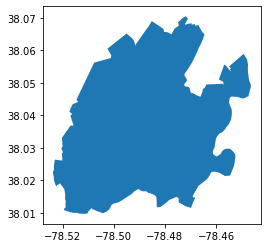

In [5]:
cville.plot()

In [6]:
roads = gpd.read_file('/Users/ep9k/Desktop/cville_gis_data/Road_centerlines.shp')
roads

,OBJECTID,L_LADD,L_HADD,R_LADD,R_HADD,PREDIR,STREET,SUFFIX,POSDIR,STREETNAME,ST_CLASS,ONE_WAY,SPEED,geometry
0,1,117,123,116,124,None,CLEVELAND,AVE,None,CLEVELAND AVE,MA,None,25,"LINESTRING (-78.51325 38.02047, -78.51321 38.0..."
1,2,2300,2300,0,0,None,HILL,ST,None,HILL ST,LC,None,25,"LINESTRING (-78.51179 38.02446, -78.51178 38.0..."
2,3,0,0,1973,1999,None,JEFFERSON PARK,AVE,None,JEFFERSON PARK AVE,PA,FT,35,"LINESTRING (-78.51246 38.02704, -78.51260 38.0..."
3,4,2100,2124,2101,2123,None,HILL,ST,None,HILL ST,LC,None,25,"LINESTRING (-78.51186 38.02593, -78.51183 38.0..."
4,5,0,0,1947,1971,None,JEFFERSON PARK,AVE,None,JEFFERSON PARK AVE,PA,FT,35,"LINESTRING (-78.51214 38.02724, -78.51246 38.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,21865,600,680,601,681,None,MASSIE,RD,None,MASSIE RD,N/A,None,25,"LINESTRING (-78.50798 38.05228, -78.50794 38.0..."
2706,23456,0,0,583,602,None,BRANDON,AVE,None,BRANDON AVE,N/A,None,25,"LINESTRING (-78.50464 38.02982, -78.50430 38.0..."
2707,23857,0,0,981,987,None,5TH,ST,SW,5TH ST SW,MA,FT,45,"LINESTRING (-78.49400 38.02145, -78.49418 38.0..."
2708,24257,0,1301,0,0,None,CARLTON,AVE,None,CARLTON AVE,LC,None,25,"LINESTRING (-78.47006 38.02273, -78.46997 38.0..."


<AxesSubplot:>

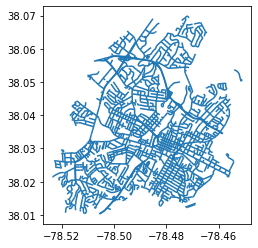

In [10]:
roads.plot()

<AxesSubplot:>

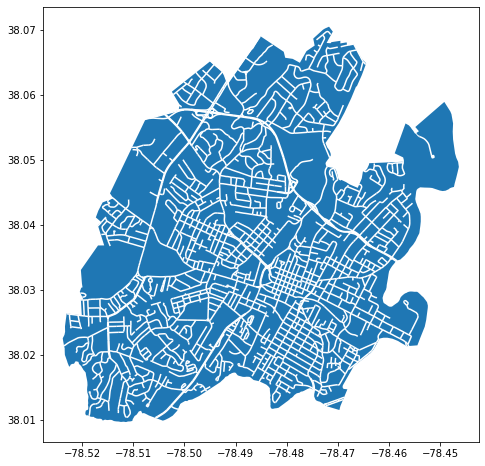

In [9]:
## plot as different layers on top of each other. Stack them on top of each other
## we are not just limited to two layers when plotting
fig, ax = plt.subplots(figsize=(10,8))
cville.plot(ax=ax)
roads.plot(ax=ax, color='white')